## <center> Support Vector Machines (SVMs) in scikit-learn </center>

- for classification and regression (SVCs, SVRs)
- can be applied on linear and non-linear data
- look for the best separating line or decision boundary
- look for the largest margin 

![](SVM.png)

![](SVM2.png)

![](SVM3.png)

### Commonly used kernels:

- linear
- polynomial
- radial basis function (RBF) - Gaussian RBF
- sigmoid
- etc.

In [1]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.4f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.4f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


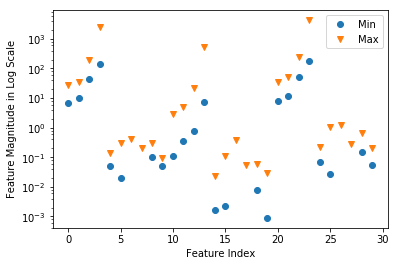

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [3]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum per feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [4]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.948
The accuracy on the test subset: 0.951


In [6]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


## <center> Advantages and Disadvantages of SVMs (scikit-learn) </center>

### Stronger points:
 - they are versatile
 - can build complex decision boundaries on low-dimensional data
 - can work well on high-dimensional data with relatively small sample size
 - etc.

 
### Weaker points:
 - don't perform well on high-dimensional data with many samples (i.e. > 100k)
 - preprocessing may be required => implies knowledge and understanding of hyper-parameters
 - harder to inspect and visualize
 - etc.
 
 
### Alternatives:
 
 - DT and Random Forests (require less/no preprocessing of data, easier to understand, inspect, and visualize)
 
### Good practices: 
- data scaling
- other pre-processing
- choosing an appropriate kernel
- tuning hyper-parameters: C, gamma, etc. 

## <center> Uncertainty Estimation </center>

In [7]:
print('The decision function is:\n\n{}'.format(svm.decision_function(X_test_scaled)[:20]))

The decision function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]


In [8]:
print('Thresholded decision function:\n\n{}'.format(svm.decision_function(X_test_scaled)[:20]>0))

Thresholded decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [9]:
svm.classes_

array([0, 1])